<!-- 1. Exploratory Data Analysis of Customer Travel Preferences and Behaviours
Objective:- The primary objective of this Exploratory Data Analysis (EDA) is to uncover 
insights into customer demographics, behaviours, and preferences within the context of travel 
product offerings. By investigating various aspects of the data, such as age distribution, 
contact type, city tier, occupation, and purchasing behaviour, the analysis aims to: 
A. What is the distribution of customerages, and how does age relate to product purchase 
(ProdTaken)? 
B. How does the type of contact(type of contact)influence the likelihood of purchasing a 
travel product? 
C. Is there a correlation between the city tier(citytier)and monthly income (monthly 
income) of customers?
D. What is the average duration of a pitch (duration of pitch)for customers who 
purchased a product versus those who did not? 
E. How do occupation types(occupation)distribute among customers,and is there an 
occupation type that is more likely to purchase a travel product? 
F. Are there any gender-based preferences for the type of product pitched
(ProductPitched)? 
G. What is the relationship between the number of trips(number of trips)taken by a 
customer and their likelihood to purchase a new travel product?
H. Does having a passport(passport)correlate with a higher number of trips taken or a 
higher likelihood of purchasing a travel product? 
I. How satisfied are customers with the pitch (pitch satisfaction score),and does this 
satisfaction influence product purchase? 
J. Among customers with children (number of children visiting), how does the number 
of children impact travel product purchases? 
K. Gender preferences for product types: how does gender influence the preference for 
different types of travel products pitched (product pitched)? 
L. Impact of marital status on travel preferences: does marital status affect the choice of 
travel product, and if so, how do different marital statuses correlate with product
purchases (prod taken)? 
M. Relationship between number of children and travel product interest: how does the 
number of children visiting (number of children visiting) impact the likelihood of 
purchasing a travel product? 
N. Influence of owning a car on travel decisions: is there a correlation between owning a 
car (own car) and the number of trips taken (number of trips) or the type of travel 
product purchased? 
O. Income level and product choice: how does the monthly income (monthly income) of 
customers influence their choice of travel products, and is there a preferred product 
for different income levels? -->

1. Exploratory Data Analysis of Customer Travel Preferences and Behaviours
Objective:- The primary objective of this Exploratory Data Analysis (EDA) is to uncover 
insights into customer demographics, behaviours, and preferences within the context of travel 
product offerings. By investigating various aspects of the data, such as age distribution, 
contact type, city tier, occupation, and purchasing behaviour, the analysis aims to:

A. What is the distribution of customerages, and how does age relate to product purchase 
(ProdTaken)?

In [26]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import  numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('D:\machine_learning_projects\Customer_Holiday_Experience\Dataset\Travel.csv')

In [28]:
df.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


## age vs ProductTaken

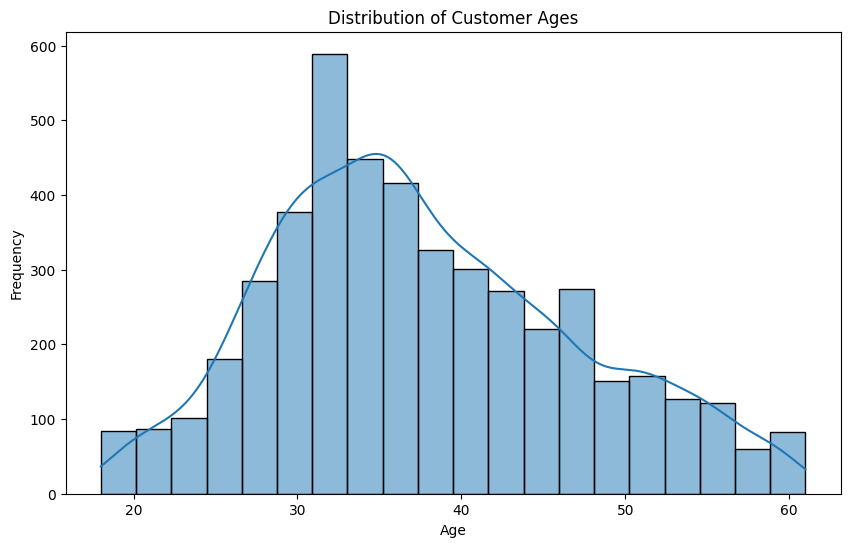

In [29]:


# 1. Distribution of Customer Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [31]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

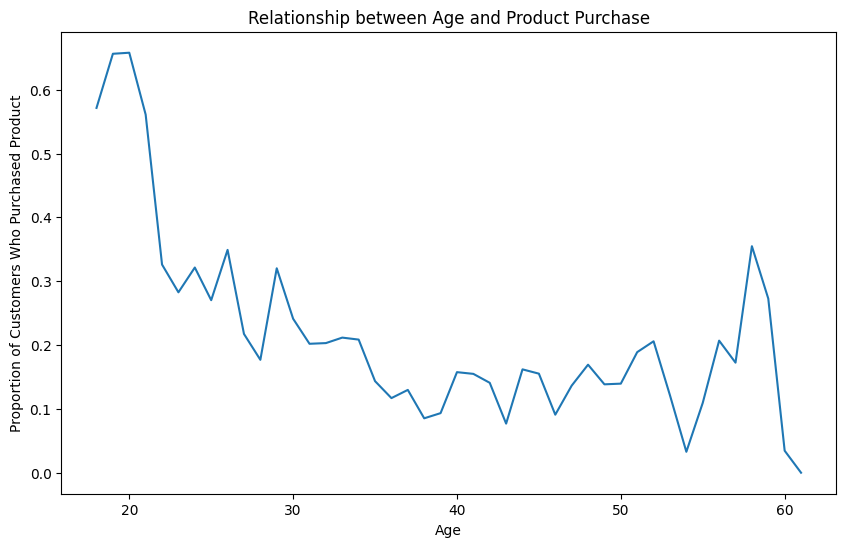

In [32]:
# 2. Relationship between Age and Product Purchase
age_prod_taken = df.groupby('Age')['ProdTaken'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='ProdTaken', data=age_prod_taken)
plt.title('Relationship between Age and Product Purchase')
plt.xlabel('Age')
plt.ylabel('Proportion of Customers Who Purchased Product')
plt.show()


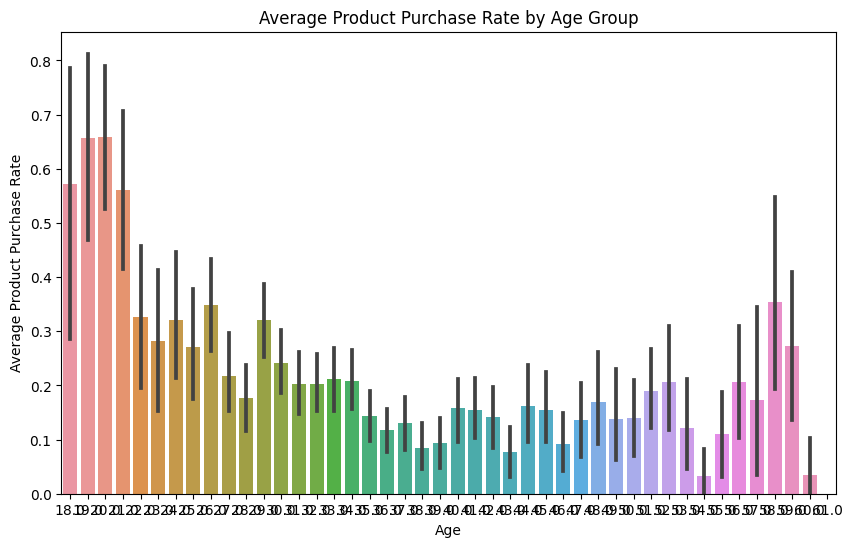

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='ProdTaken', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Product Purchase Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Product Purchase Rate')
plt.show()

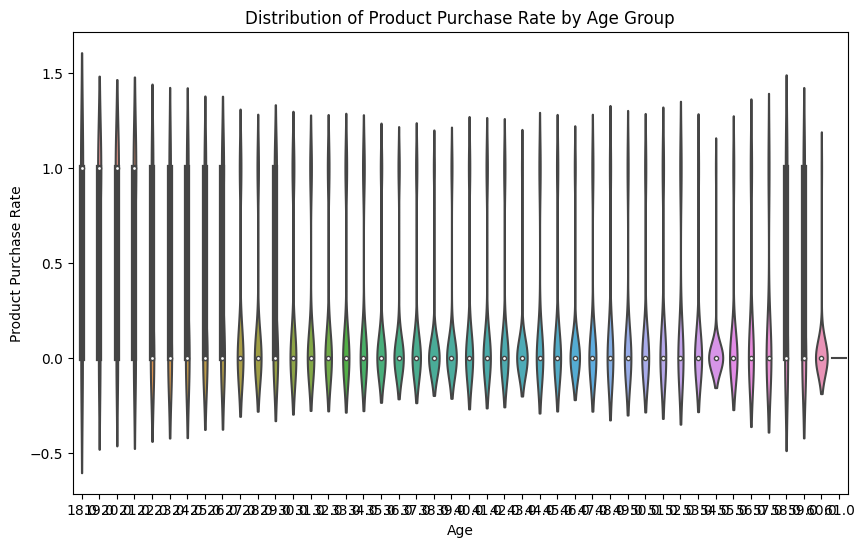

In [34]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='ProdTaken', data=df)
plt.title('Distribution of Product Purchase Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Product Purchase Rate')
plt.show()

In [35]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


B. How does the type of contact(type of contact)influence the likelihood of purchasing a 
travel product? 

In [36]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

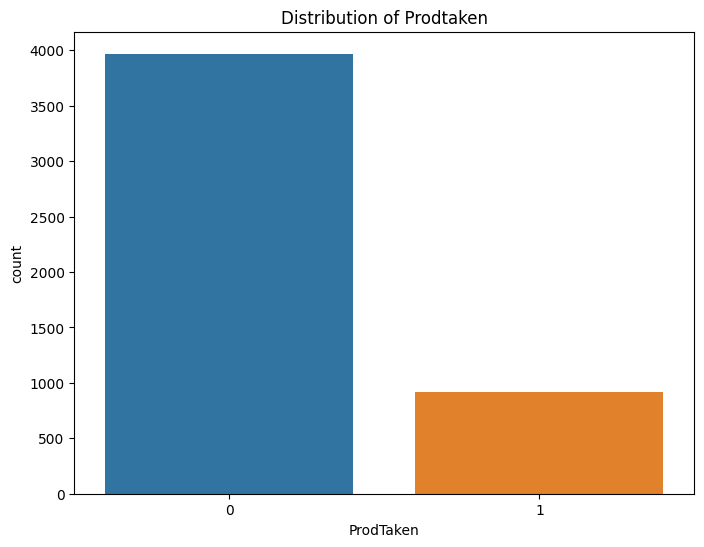

In [37]:
# Countplot to visualize the distribution of 'Prodtaken' (purchased or not)
plt.figure(figsize=(8, 6))
sns.countplot(x='ProdTaken', data=df)
plt.title('Distribution of Prodtaken')
plt.show()

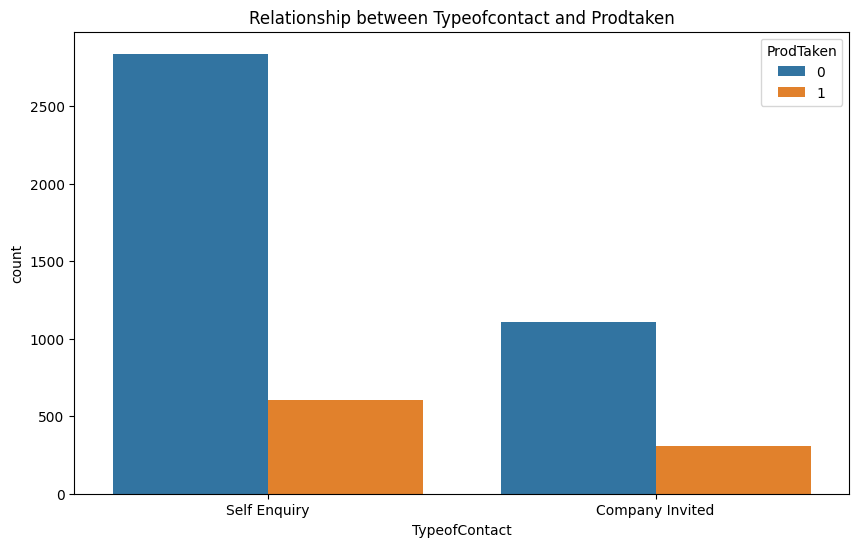

ProdTaken           0    1
TypeofContact             
Company Invited  1109  310
Self Enquiry     2837  607


In [38]:


# Countplot to visualize the relationship between 'Typeofcontact' and 'Prodtaken'
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeofContact', hue='ProdTaken', data=df)
plt.title('Relationship between Typeofcontact and Prodtaken')
plt.show()

# Crosstab to calculate the frequency of 'Prodtaken' based on 'Typeofcontact'
cross_tab = pd.crosstab(df['TypeofContact'], df['ProdTaken'])
print(cross_tab)



In [39]:
# Chi-square test of independence to assess the association between 'Typeofcontact' and 'Prodtaken'
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-square value: 11.430425385164082
P-value: 0.0007225114229346287
Degrees of Freedom: 1


In [40]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

## C. Is there a correlation between the city tier(citytier)and monthly income (monthly 
income) of customers

## CityTier vs MonthlyIncome 

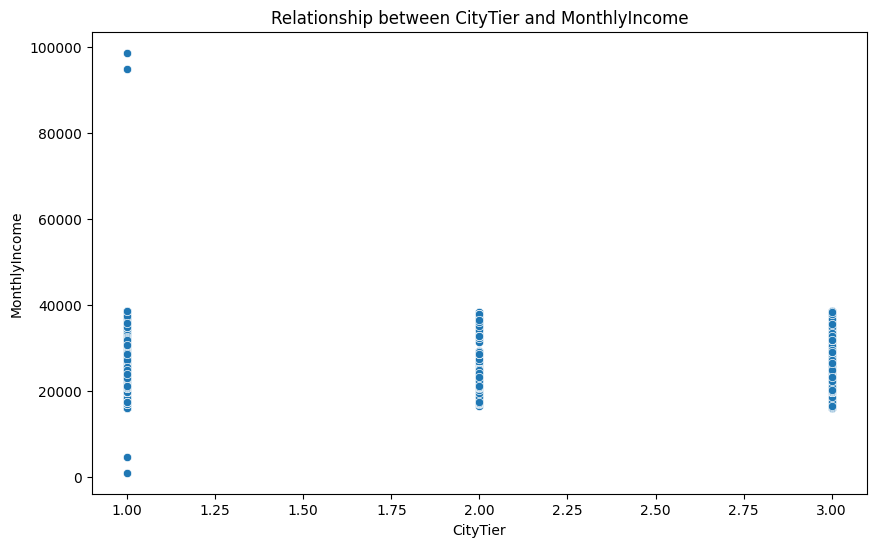

Pearson correlation coefficient: 0.05181691698577293


In [41]:
# Scatterplot to visualize the relationship between 'CityTier' and 'MonthlyIncome'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CityTier', y='MonthlyIncome', data=df)
plt.title('Relationship between CityTier and MonthlyIncome')
plt.xlabel('CityTier')
plt.ylabel('MonthlyIncome')
plt.show()

# Calculate Pearson correlation coefficient
correlation = df['CityTier'].corr(df['MonthlyIncome'])
print(f"Pearson correlation coefficient: {correlation}")

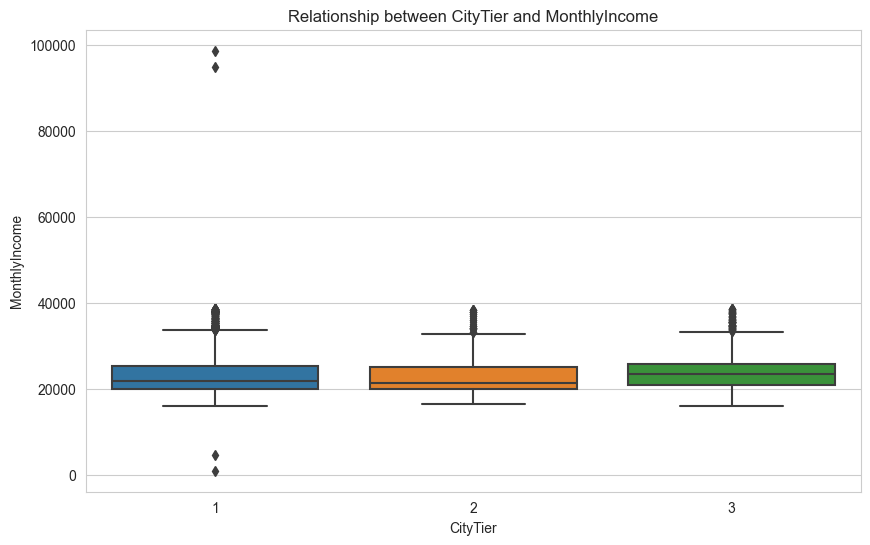

In [44]:


# Set the style of seaborn
sns.set_style("whitegrid")

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the relationship between 'CityTier' and 'MonthlyIncome'
sns.boxplot(x='CityTier', y='MonthlyIncome', data=df)

# Add labels and title
plt.title('Relationship between CityTier and MonthlyIncome')
plt.xlabel('CityTier')
plt.ylabel('MonthlyIncome')

# Show plot
plt.show()


## D. What is the average duration of a pitch (duration of pitch)for customers who 
purchased a product versus those who did not?

In [46]:

# Calculate the average duration of pitch for customers who purchased a product
avg_duration_purchased = df[df['ProdTaken'] == 1]['DurationOfPitch'].mean()

# Calculate the average duration of pitch for customers who did not purchase a product
avg_duration_not_purchased = df[df['ProdTaken'] == 0]['DurationOfPitch'].mean()

# Print the results
print("Average duration of pitch for customers who purchased a product:", avg_duration_purchased)
print("Average duration of pitch for customers who did not purchase a product:", avg_duration_not_purchased)


Average duration of pitch for customers who purchased a product: 16.873142857142856
Average duration of pitch for customers who did not purchase a product: 15.169324827219564


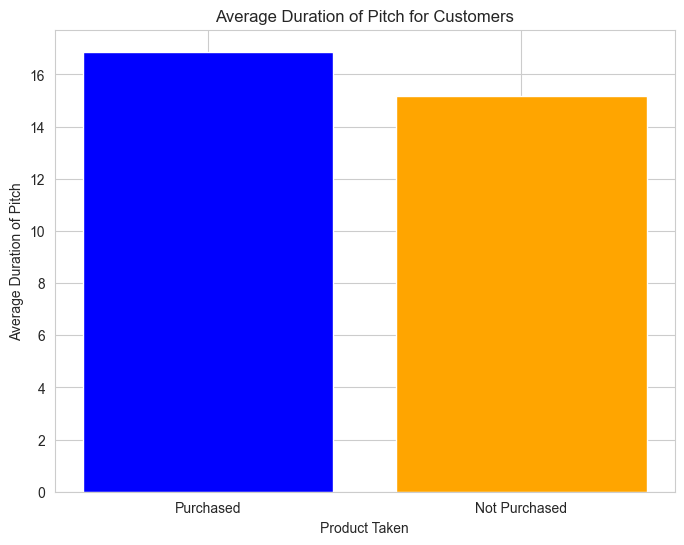

In [47]:


# Calculate the average duration of pitch for customers who purchased a product
avg_duration_purchased = df[df['ProdTaken'] == 1]['DurationOfPitch'].mean()

# Calculate the average duration of pitch for customers who did not purchase a product
avg_duration_not_purchased = df[df['ProdTaken'] == 0]['DurationOfPitch'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Purchased', 'Not Purchased'], [avg_duration_purchased, avg_duration_not_purchased], color=['blue', 'orange'])
plt.title('Average Duration of Pitch for Customers')
plt.xlabel('Product Taken')
plt.ylabel('Average Duration of Pitch')
plt.show()


In [ ]:
##this shows that product purchased by the people usually takes 16 minutes 

In [55]:
df[df['ProdTaken'] == 1]['DurationOfPitch']

0        6.0
2        8.0
14      30.0
21      15.0
24      12.0
        ... 
4883     9.0
4884    31.0
4885    17.0
4886    16.0
4887    14.0
Name: DurationOfPitch, Length: 920, dtype: float64

In [57]:
sum(df.isnull().sum())

1012

In [58]:
df.duplicated().sum()

0

In [59]:
df.shape

(4888, 20)

## E. How do occupation types(occupation)distribute among customers,and is there an 
occupation type that is more likely to purchase a travel product?

In [60]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

Occupation Distribution:
Occupation
Salaried          0.484452
Small Business    0.426350
Large Business    0.088789
Free Lancer       0.000409
Name: proportion, dtype: float64

Likelihood of Purchasing a Travel Product by Occupation:
Occupation
Free Lancer       1.000000
Large Business    0.276498
Small Business    0.184261
Salaried          0.174831
Name: ProdTaken, dtype: float64



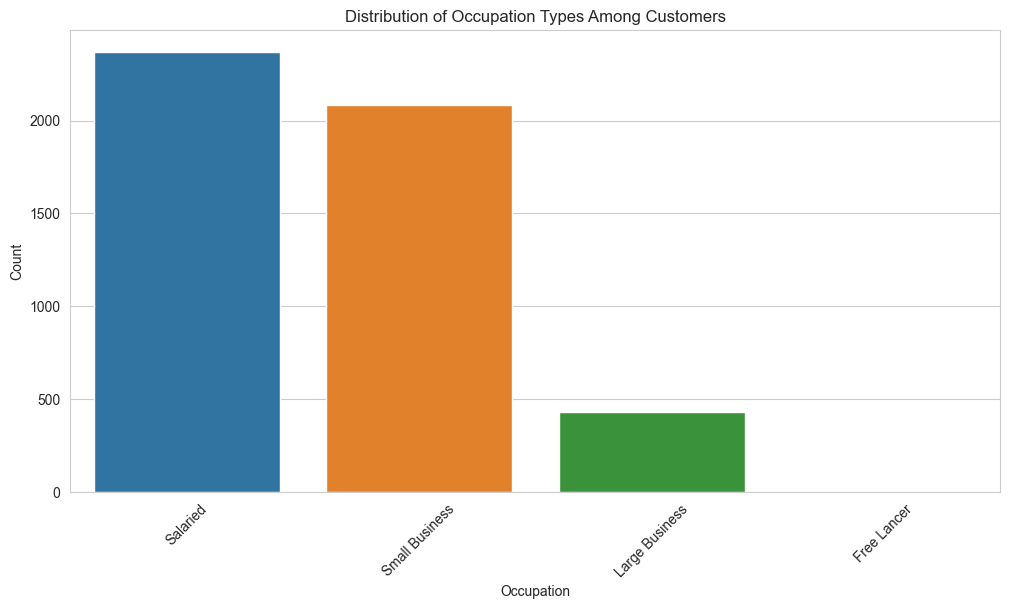

In [62]:



# Calculate the distribution of occupation types among customers
occupation_distribution = df['Occupation'].value_counts(normalize=True)

# Print the distribution of occupation types
print("Occupation Distribution:")
print(occupation_distribution)
print()

# Calculate the proportion of customers from each occupation type who purchased a travel product
purchase_by_occupation = df.groupby('Occupation')['ProdTaken'].mean().sort_values(ascending=False)

# Print the likelihood of purchasing a travel product for each occupation type
print("Likelihood of Purchasing a Travel Product by Occupation:")
print(purchase_by_occupation)
print()

# Visualize the distribution of occupation types among customers
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', data=df, order=df['Occupation'].value_counts().index)
plt.title('Distribution of Occupation Types Among Customers')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




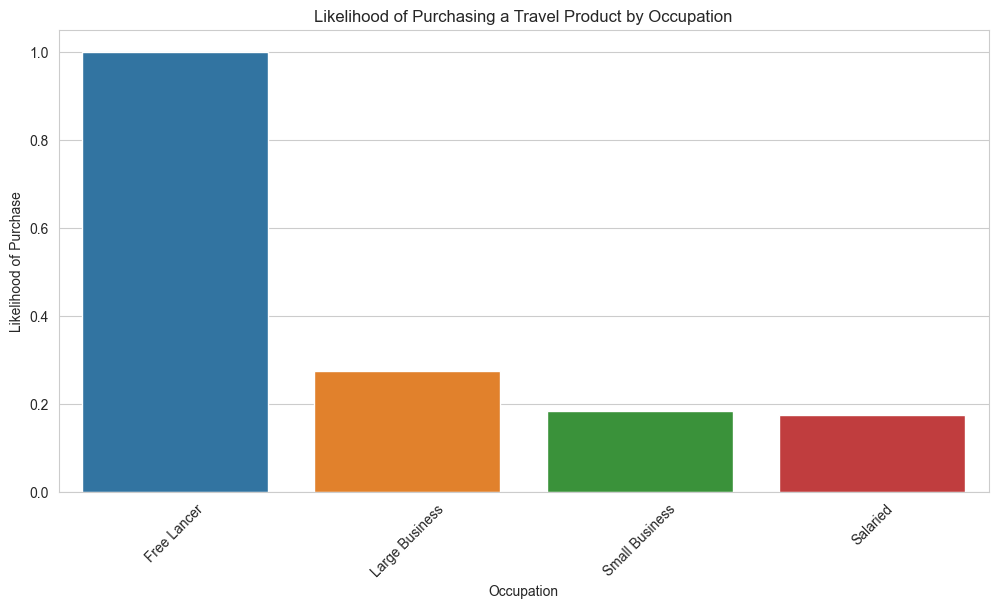

In [63]:
# Visualize the likelihood of purchasing a travel product for each occupation type
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_by_occupation.index, y=purchase_by_occupation.values, order=purchase_by_occupation.index)
plt.title('Likelihood of Purchasing a Travel Product by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Likelihood of Purchase')
plt.xticks(rotation=45)
plt.show()

In [64]:
##Mostly freelancers are willing to purchase travel plan as compared to small , large and Salaried Individuals So our target audience will be freelancer mainly

F. Are there any gender-based preferences for the type of product pitched
(ProductPitched)? 

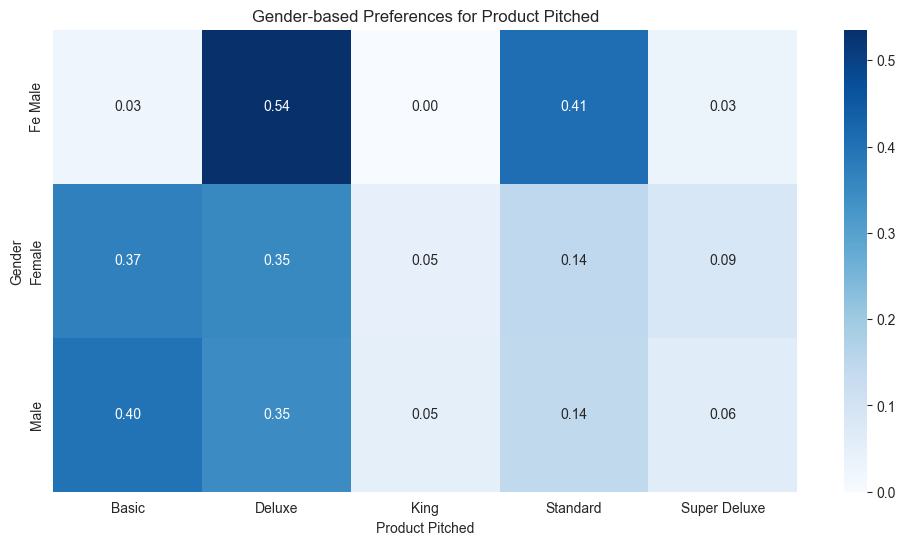

In [65]:

# Assuming your dataset is already loaded into a DataFrame named df

# Calculate the proportion of each product pitched to each gender
product_pitched_by_gender = df.groupby(['Gender', 'ProductPitched']).size().unstack(fill_value=0)
product_pitched_by_gender = product_pitched_by_gender.div(product_pitched_by_gender.sum(axis=1), axis=0)

# Visualize the proportion of each product pitched to each gender
plt.figure(figsize=(12, 6))
sns.heatmap(product_pitched_by_gender, annot=True, cmap='Blues', fmt=".2f")
plt.title('Gender-based Preferences for Product Pitched')
plt.xlabel('Product Pitched')
plt.ylabel('Gender')
plt.show()


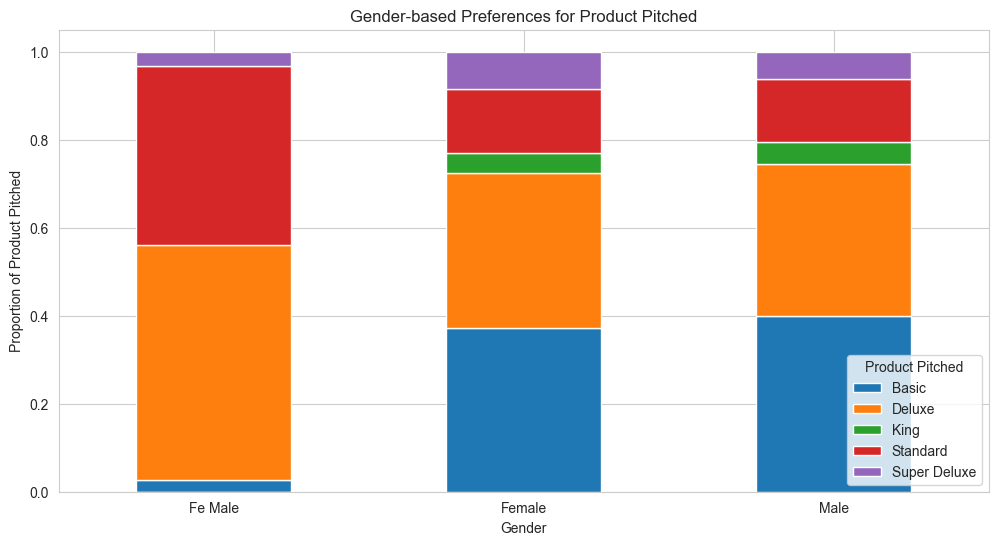

In [66]:


# Calculate the proportion of each product pitched to each gender
product_pitched_by_gender = df.groupby(['Gender', 'ProductPitched']).size().unstack(fill_value=0)
product_pitched_by_gender = product_pitched_by_gender.div(product_pitched_by_gender.sum(axis=1), axis=0)

# Visualize the proportion of each product pitched to each gender using bar plots
product_pitched_by_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender-based Preferences for Product Pitched')
plt.xlabel('Gender')
plt.ylabel('Proportion of Product Pitched')
plt.xticks(rotation=0)
plt.legend(title='Product Pitched')
plt.show()


G. What is the relationship between the number of trips(number of trips)taken by a 
customer and their likelihood to purchase a new travel product?

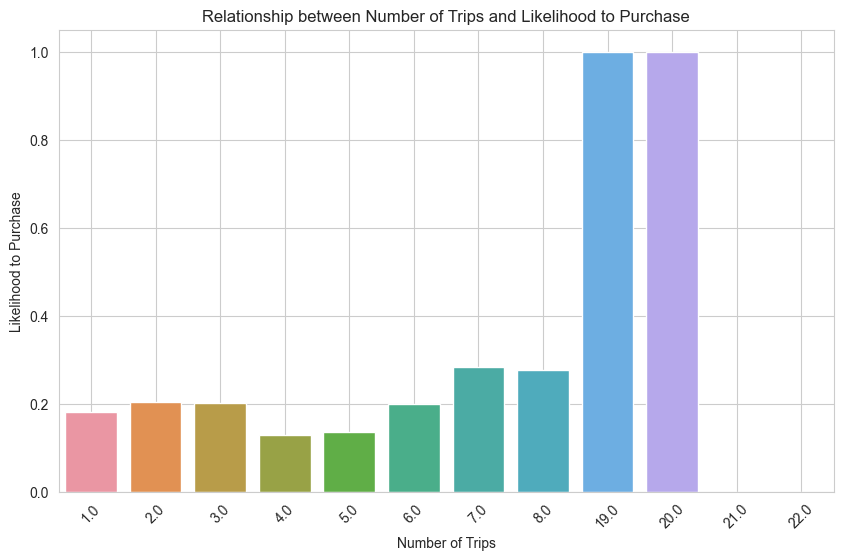

In [70]:

# Calculate the proportion of customers who purchased a new travel product for each number of trips taken
purchase_by_trips = df.groupby('NumberOfTrips')['ProdTaken'].mean()

# Visualize the relationship between the number of trips taken and the likelihood to purchase a new travel product
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_by_trips.index, y=purchase_by_trips.values)
plt.title('Relationship between Number of Trips and Likelihood to Purchase')
plt.xlabel('Number of Trips')
plt.ylabel('Likelihood to Purchase')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


H. Does having a passport(passport)correlate with a higher number of trips taken or a 
higher likelihood of purchasing a travel product?

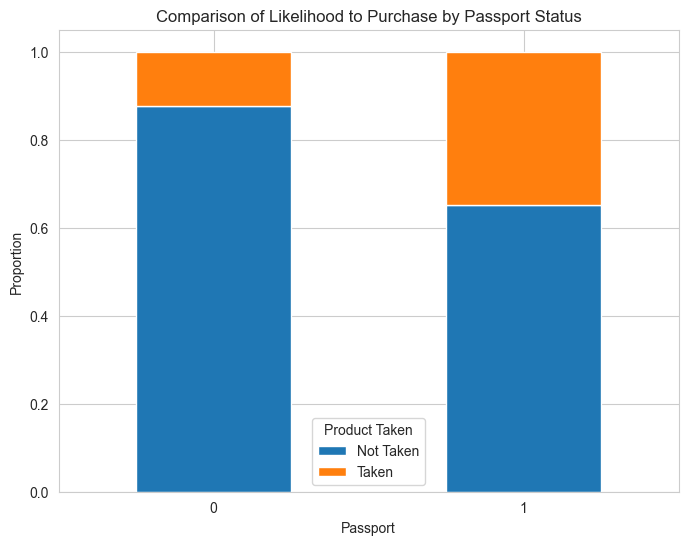

In [71]:
# Bar plot for comparing the likelihood of purchasing a travel product by customers with and without a passport
purchase_passport_table = pd.crosstab(df['Passport'], df['ProdTaken'], normalize='index')
purchase_passport_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Comparison of Likelihood to Purchase by Passport Status')
plt.xlabel('Passport')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])
plt.show()


<Figure size 800x600 with 0 Axes>

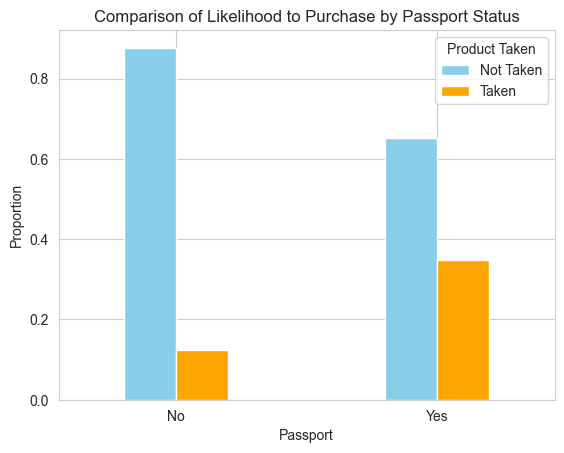

In [72]:

# Calculate the proportion of customers with and without a passport who either did or did not purchase a travel product
purchase_passport_table = pd.crosstab(df['Passport'], df['ProdTaken'], normalize='index')

# Plot the grouped bar plot
plt.figure(figsize=(8, 6))
purchase_passport_table.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], width=0.4)
plt.title('Comparison of Likelihood to Purchase by Passport Status')
plt.xlabel('Passport')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Product Taken', labels=['Not Taken', 'Taken'])
plt.show()


I. How satisfied are customers with the pitch (pitch satisfaction score),and does this 
satisfaction influence product purchase?

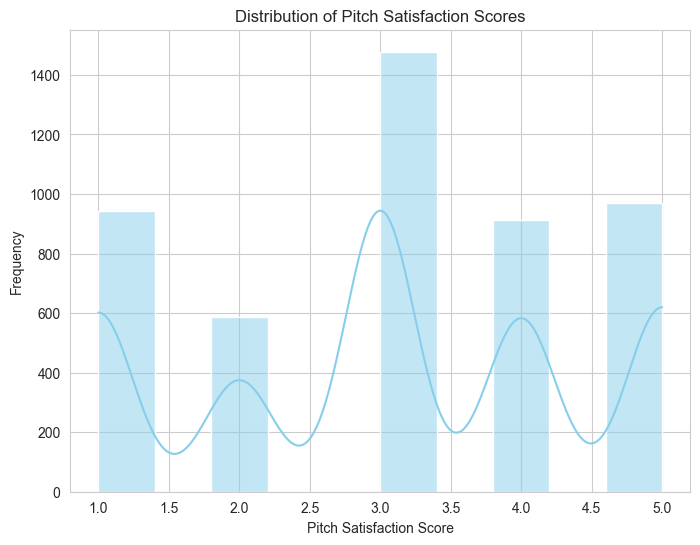

In [73]:


# Explore the distribution of pitch satisfaction scores
plt.figure(figsize=(8, 6))
sns.histplot(df['PitchSatisfactionScore'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Pitch Satisfaction Scores')
plt.xlabel('Pitch Satisfaction Score')
plt.ylabel('Frequency')
plt.show()



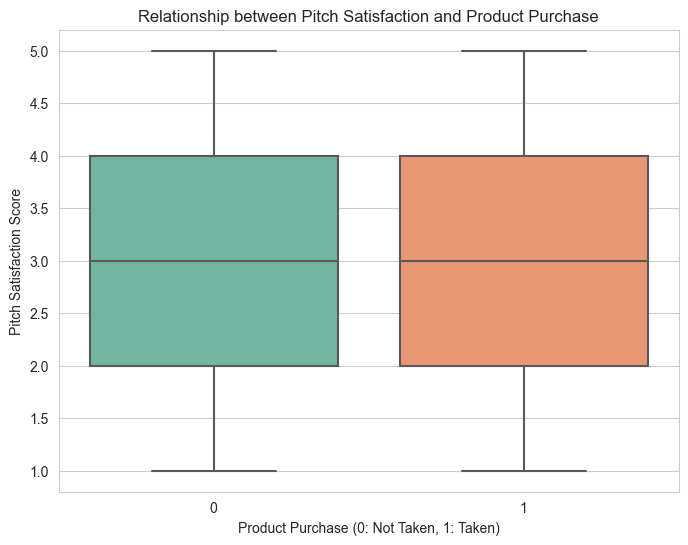

In [74]:


# Examine the relationship between pitch satisfaction scores and product purchase
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProdTaken', y='PitchSatisfactionScore', data=df, palette='Set2')
plt.title('Relationship between Pitch Satisfaction and Product Purchase')
plt.xlabel('Product Purchase (0: Not Taken, 1: Taken)')
plt.ylabel('Pitch Satisfaction Score')
plt.show()


J. Among customers with children (number of children visiting), how does the number 
of children impact travel product purchases?

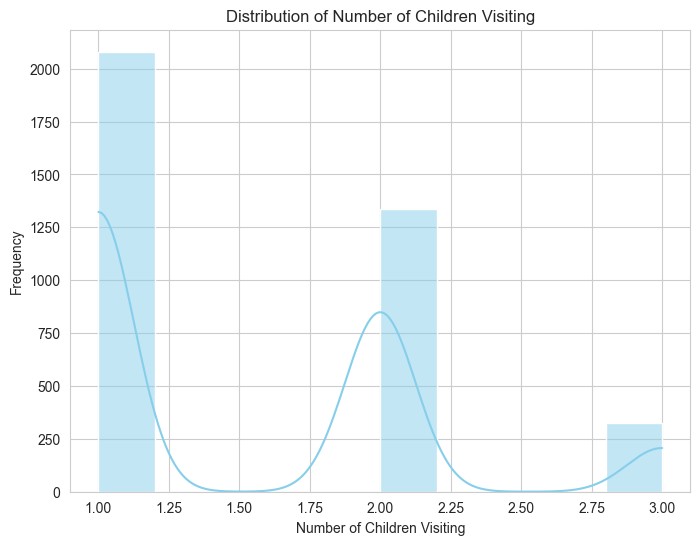

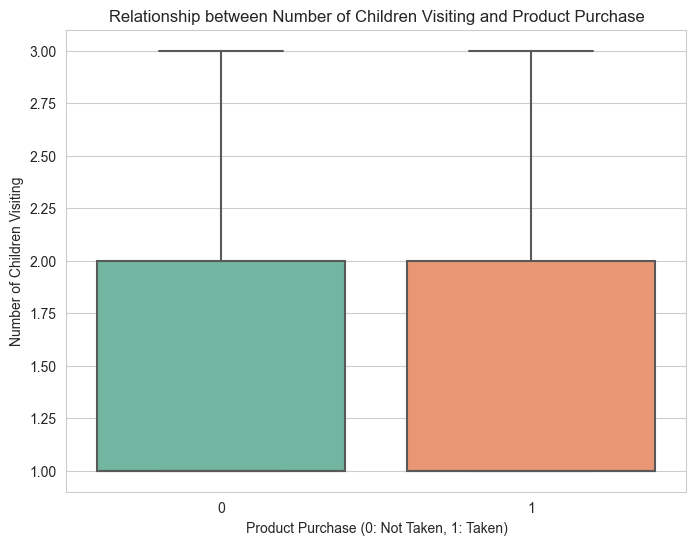

In [75]:


# Filter the data to include only customers with children
df_with_children = df[df['NumberOfChildrenVisiting'] > 0]

# Explore the distribution of the number of children visiting
plt.figure(figsize=(8, 6))
sns.histplot(df_with_children['NumberOfChildrenVisiting'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Number of Children Visiting')
plt.xlabel('Number of Children Visiting')
plt.ylabel('Frequency')
plt.show()

# Examine the relationship between the number of children visiting and travel product purchases
plt.figure(figsize=(8, 6))
sns.boxplot(x='ProdTaken', y='NumberOfChildrenVisiting', data=df_with_children, palette='Set2')
plt.title('Relationship between Number of Children Visiting and Product Purchase')
plt.xlabel('Product Purchase (0: Not Taken, 1: Taken)')
plt.ylabel('Number of Children Visiting')
plt.show()


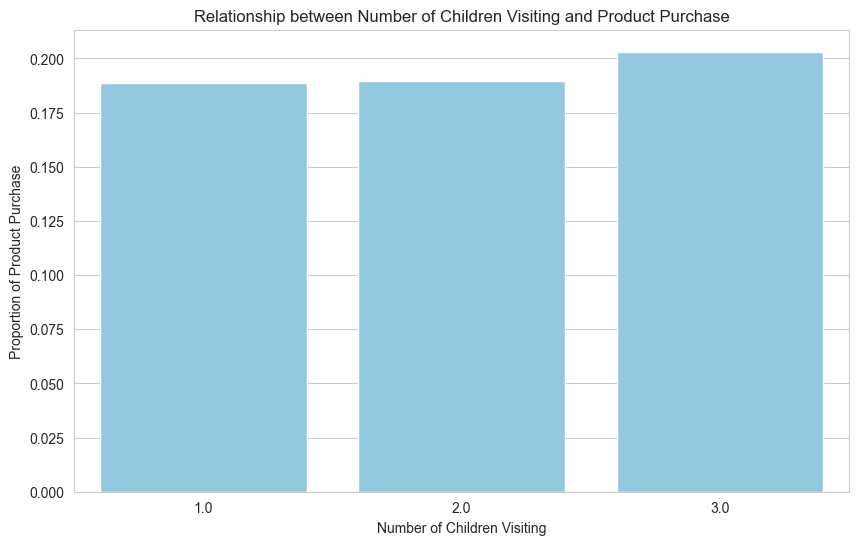

In [76]:


# Filter the data to include only customers with children
df_with_children = df[df['NumberOfChildrenVisiting'] > 0]

# Calculate the proportion of customers who purchased a travel product based on the number of children visiting
purchase_by_children = df_with_children.groupby('NumberOfChildrenVisiting')['ProdTaken'].mean()

# Visualize the relationship between the number of children visiting and travel product purchases using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_by_children.index, y=purchase_by_children.values, color='skyblue')
plt.title('Relationship between Number of Children Visiting and Product Purchase')
plt.xlabel('Number of Children Visiting')
plt.ylabel('Proportion of Product Purchase')
plt.show()


K. Gender preferences for product types: how does gender influence the preference for 
different types of travel products pitched (product pitched)?

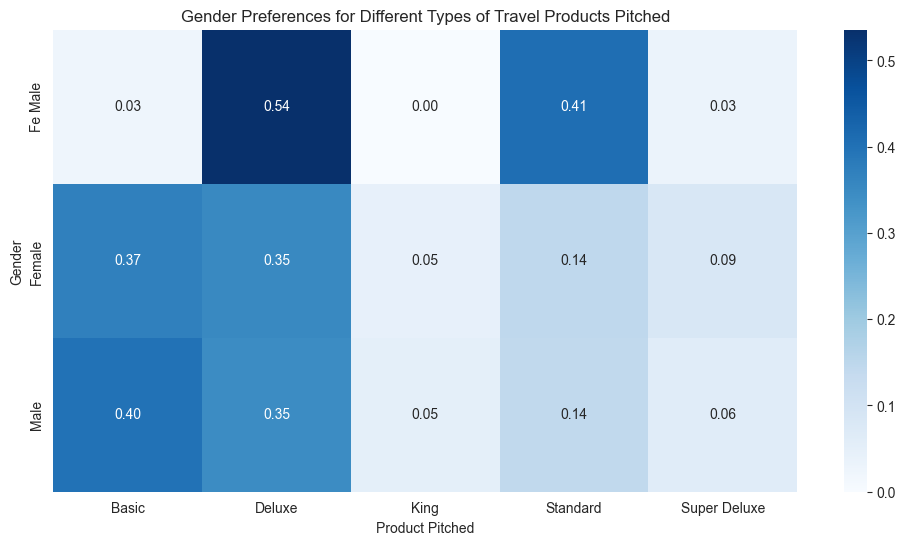

In [77]:


# Group the data by gender and product pitched and calculate the proportion
gender_product_preference = df.groupby(['Gender', 'ProductPitched']).size().unstack(fill_value=0)
gender_product_preference = gender_product_preference.div(gender_product_preference.sum(axis=1), axis=0)

# Visualize the gender preferences for different types of travel products pitched
plt.figure(figsize=(12, 6))
sns.heatmap(gender_product_preference, annot=True, cmap='Blues', fmt=".2f")
plt.title('Gender Preferences for Different Types of Travel Products Pitched')
plt.xlabel('Product Pitched')
plt.ylabel('Gender')
plt.show()


<Figure size 1200x600 with 0 Axes>

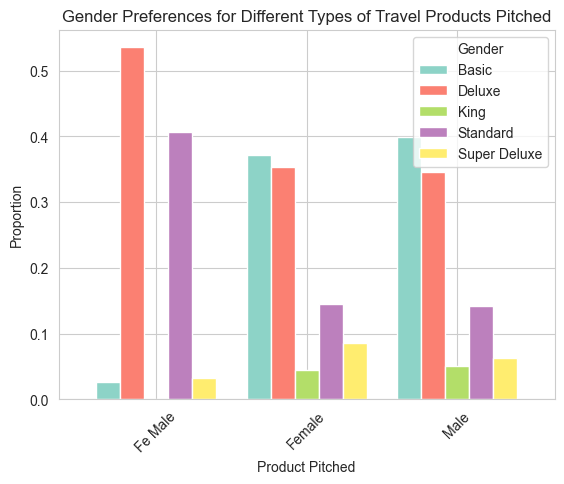

In [78]:


# Group the data by gender and product pitched and calculate the proportion
gender_product_preference = df.groupby(['Gender', 'ProductPitched']).size().unstack(fill_value=0)
gender_product_preference = gender_product_preference.div(gender_product_preference.sum(axis=1), axis=0)

# Visualize the gender preferences for different types of travel products pitched using grouped bar plots
plt.figure(figsize=(12, 6))
gender_product_preference.plot(kind='bar', stacked=False, width=0.8, cmap='Set3')
plt.title('Gender Preferences for Different Types of Travel Products Pitched')
plt.xlabel('Product Pitched')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


L. Impact of marital status on travel preferences: does marital status affect the choice of 
travel product, and if so, how do different marital statuses correlate with product 


<Figure size 1000x600 with 0 Axes>

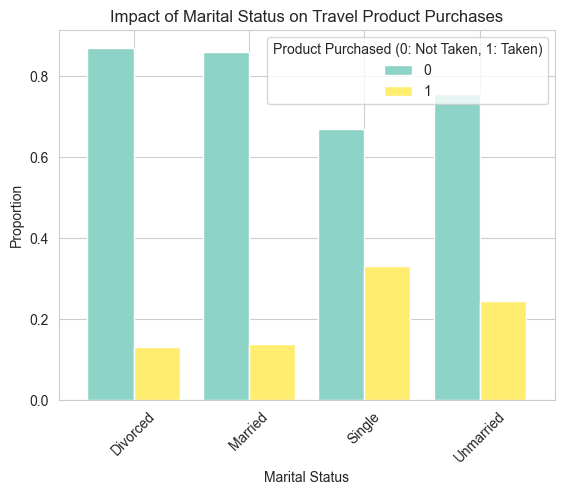

In [81]:


# Group the data by marital status and product purchases and calculate the proportion
marital_purchase_preference = df.groupby(['MaritalStatus', 'ProdTaken']).size().unstack(fill_value=0)
marital_purchase_preference = marital_purchase_preference.div(marital_purchase_preference.sum(axis=1), axis=0)

# Visualize the impact of marital status on travel product purchases using grouped bar plots
plt.figure(figsize=(10, 6))
marital_purchase_preference.plot(kind='bar', stacked=False, width=0.8, cmap='Set3')
plt.title('Impact of Marital Status on Travel Product Purchases')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Product Purchased (0: Not Taken, 1: Taken)')
plt.show()


M. Relationship between number of children and travel product interest: how does the 
number of children visiting (number of children visiting) impact the likelihood of 
purchasing a travel product?

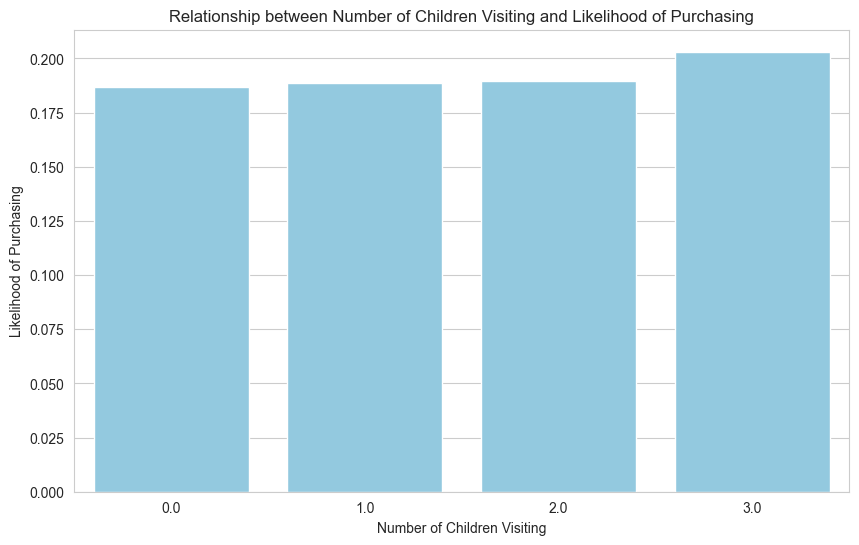

In [83]:


# Group the data by the number of children visiting and calculate the proportion
children_product_preference = df.groupby('NumberOfChildrenVisiting')['ProdTaken'].mean()

# Visualize the relationship between the number of children visiting and the likelihood of purchasing a travel product
plt.figure(figsize=(10, 6))
sns.barplot(x=children_product_preference.index, y=children_product_preference.values, color='skyblue')
plt.title('Relationship between Number of Children Visiting and Likelihood of Purchasing')
plt.xlabel('Number of Children Visiting')
plt.ylabel('Likelihood of Purchasing')
plt.show()


N. Influence of owning a car on travel decisions: is there a correlation between owning a 
car (own car) and the number of trips taken (number of trips) or the type of travel 
product purchased? 

Correlation between owning a car and the number of trips taken: -0.011824686371922764
Correlation between owning a car and the likelihood of purchasing a travel product: -0.011508116583710846


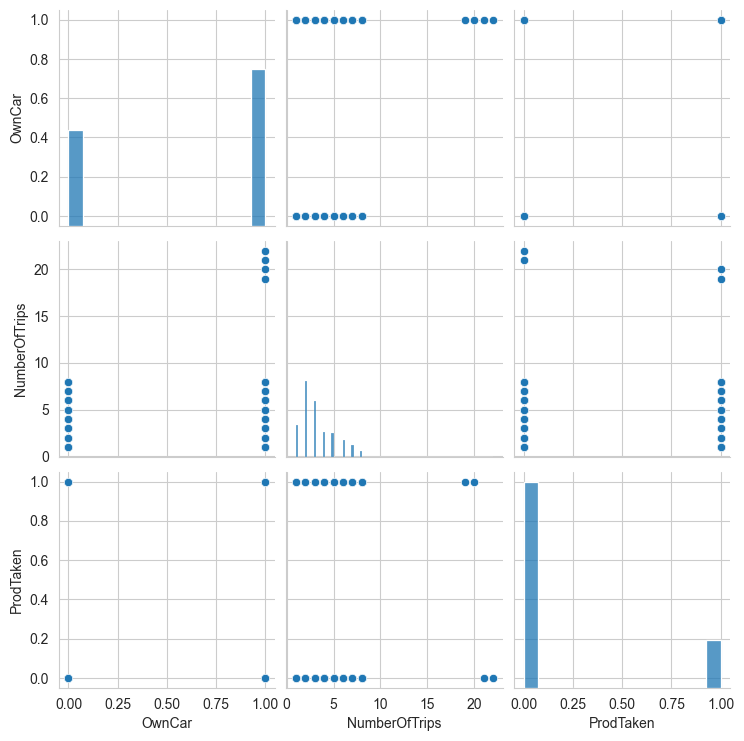

In [84]:


# Calculate the correlation between owning a car and the number of trips taken
car_trip_corr = df['OwnCar'].corr(df['NumberOfTrips'])

# Calculate the correlation between owning a car and the likelihood of purchasing a travel product
car_purchase_corr = df['OwnCar'].corr(df['ProdTaken'])

print("Correlation between owning a car and the number of trips taken:", car_trip_corr)
print("Correlation between owning a car and the likelihood of purchasing a travel product:", car_purchase_corr)

# Visualize the correlations using a pairplot
sns.pairplot(df[['OwnCar', 'NumberOfTrips', 'ProdTaken']], kind='scatter')
plt.show()


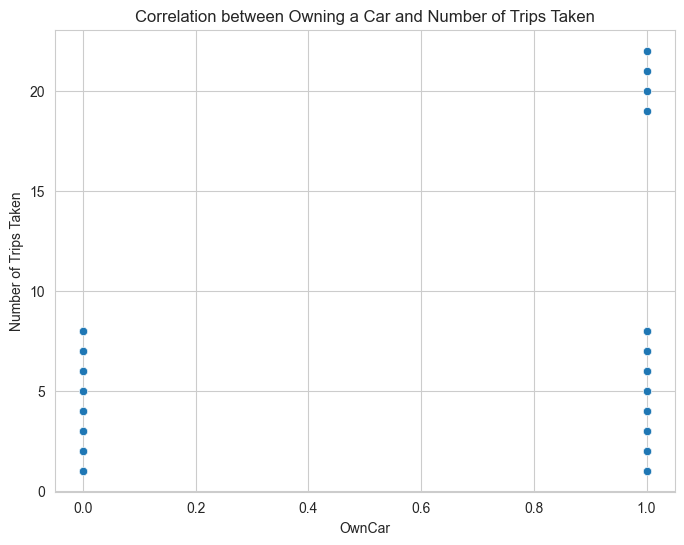

In [85]:


# Scatter plot for the correlation between owning a car and the number of trips taken
plt.figure(figsize=(8, 6))
sns.scatterplot(x='OwnCar', y='NumberOfTrips', data=df)
plt.title('Correlation between Owning a Car and Number of Trips Taken')
plt.xlabel('OwnCar')
plt.ylabel('Number of Trips Taken')
plt.show()



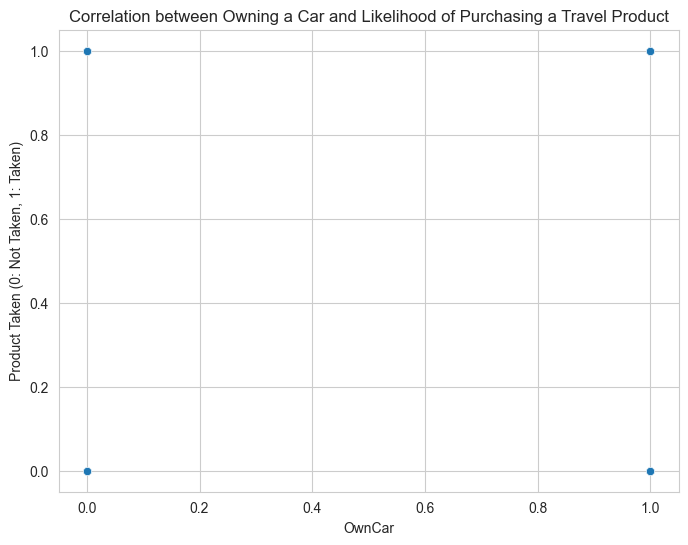

In [86]:


# Scatter plot for the correlation between owning a car and the likelihood of purchasing a travel product
plt.figure(figsize=(8, 6))
sns.scatterplot(x='OwnCar', y='ProdTaken', data=df)
plt.title('Correlation between Owning a Car and Likelihood of Purchasing a Travel Product')
plt.xlabel('OwnCar')
plt.ylabel('Product Taken (0: Not Taken, 1: Taken)')
plt.show()


O. Income level and product choice: how does the monthly income (monthly income) of 
customers influence their choice of travel products, and is there a preferred product 
for different income levels?

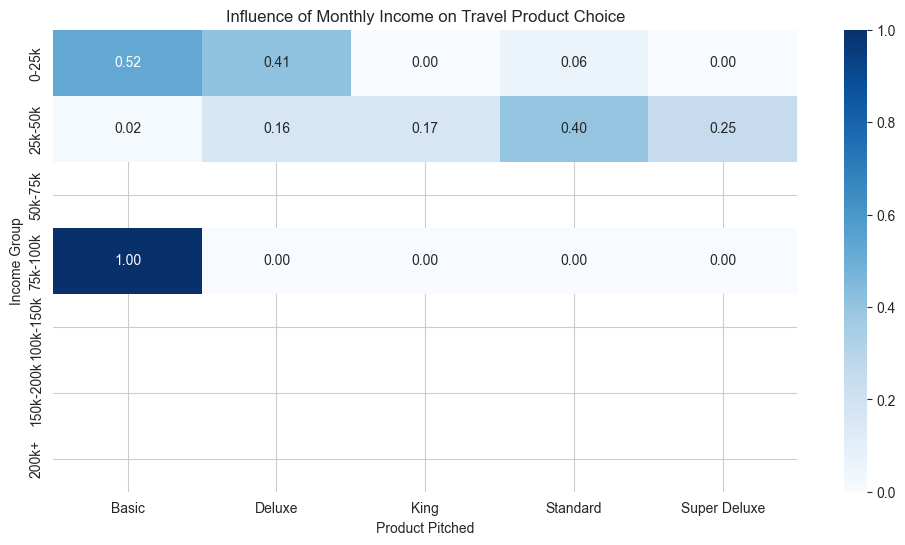

In [87]:


# Define income groups based on monthly income
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

# Group the data by income group and product choice, and calculate the proportion
income_product_preference = df.groupby(['IncomeGroup', 'ProductPitched']).size().unstack(fill_value=0)
income_product_preference = income_product_preference.div(income_product_preference.sum(axis=1), axis=0)

# Visualize the relationship between monthly income and the choice of travel products using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(income_product_preference, annot=True, cmap='Blues', fmt=".2f")
plt.title('Influence of Monthly Income on Travel Product Choice')
plt.xlabel('Product Pitched')
plt.ylabel('Income Group')
plt.show()


In [94]:
df['MonthlyIncome'].max()

98678.0

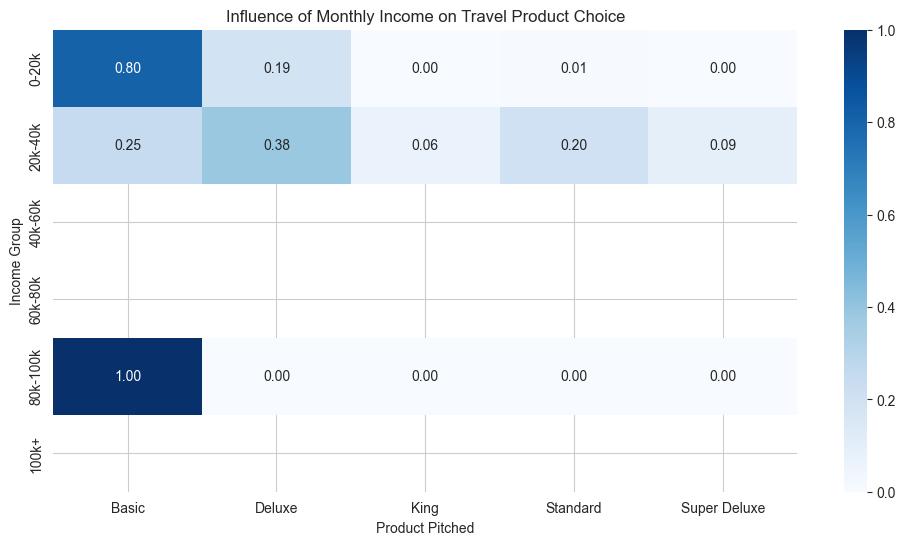

In [95]:


# Define income groups based on monthly income
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

# Group the data by income group and product choice, and calculate the proportion
income_product_preference = df.groupby(['IncomeGroup', 'ProductPitched']).size().unstack(fill_value=0)
income_product_preference = income_product_preference.div(income_product_preference.sum(axis=1), axis=0)

# Visualize the relationship between monthly income and the choice of travel products using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(income_product_preference, annot=True, cmap='Blues', fmt=".2f")
plt.title('Influence of Monthly Income on Travel Product Choice')
plt.xlabel('Product Pitched')
plt.ylabel('Income Group')
plt.show()
